In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv', parse_dates = ['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
#type and shape of data

print('data shape: ', df.shape)
print('data type: ', df.dtypes)
print('data columns: ', df.columns)

data shape:  (17414, 10)
data type:  timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
data columns:  Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
#결측치
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

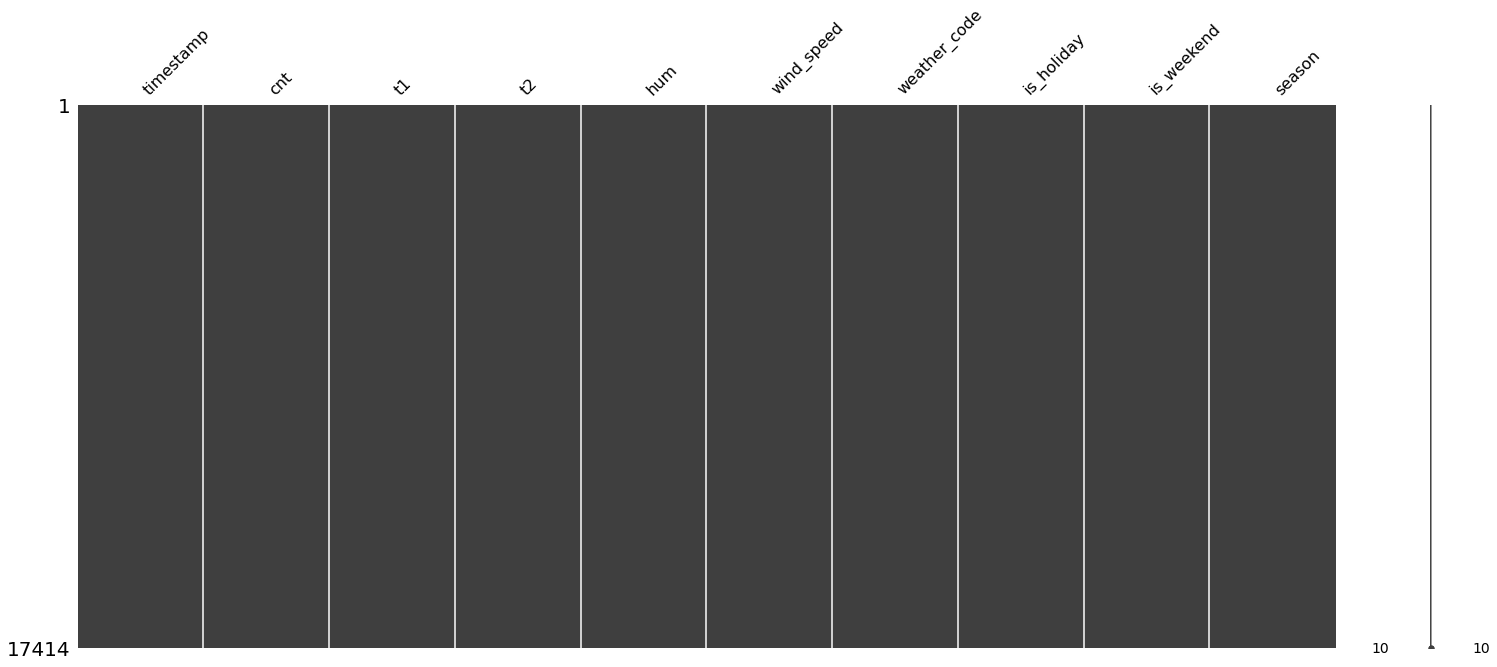

In [6]:
msno.matrix(df)
plt.show()

In [7]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [8]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='cnt'>

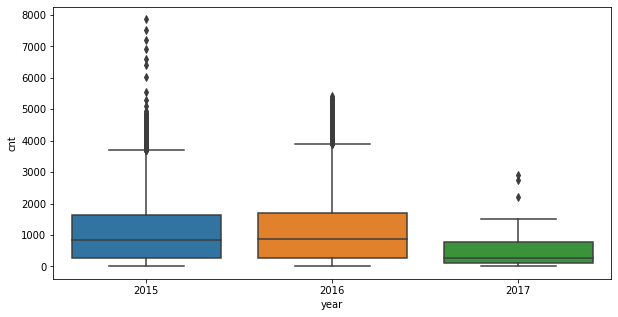

In [9]:
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['year'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='cnt'>

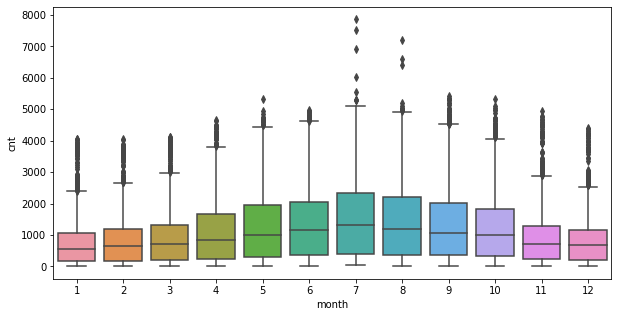

In [10]:
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['month'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

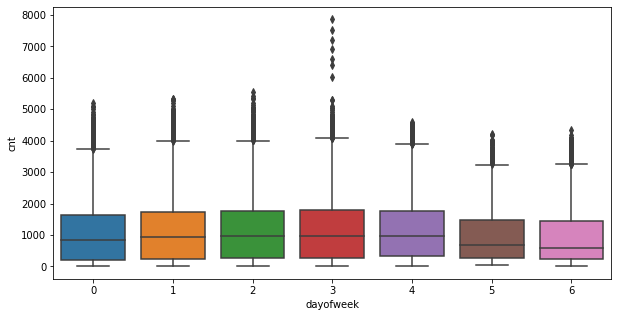

In [11]:
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['dayofweek'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='cnt'>

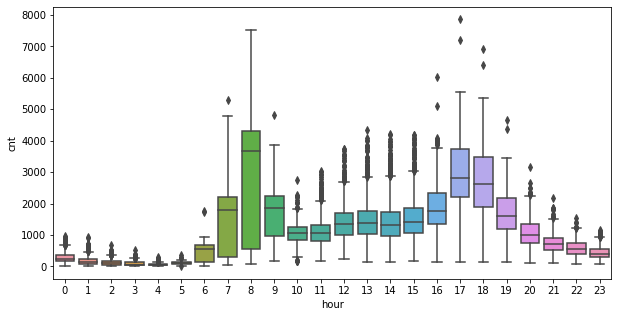

In [12]:
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['hour'], df['cnt'])

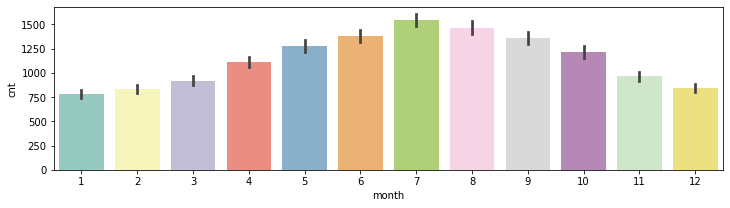

In [13]:
# graph function
def plot_bar(data, feature) :
    fig = plt.figure(figsize=(12, 3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3', orient='v')
    
plot_bar(df, 'month')

In [14]:
# remove outlier

def is_outliers(s):
    lower_limit = s.mean() - (3*s.std())
    upper_limit = s.mean() + (3*s.std())
    
    return ~s.between(lower_limit, upper_limit)


In [15]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

print('이상치 제거 전 :', df.shape)
print('이상치 제거 후 :', df_out.shape)

이상치 제거 전 : (17414, 14)
이상치 제거 후 : (17265, 14)


In [16]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [17]:
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

df_out.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [18]:
df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_out.shape

(17265, 59)

In [20]:
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp', 'cnt'], axis=1)
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# data split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=66, test_size=0.3, shuffle=False)
#shuffle : 데이터를 섞는것, 시계열 데이터에서는 False 처리 해줘야 함


In [22]:
print('shape of x_train :', x_train.shape)
print('shape of y_train :', y_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_test :', y_test.shape)

shape of x_train : (12085, 57)
shape of y_train : (12085,)
shape of x_test : (5180, 57)
shape of y_test : (5180,)


## deep learning - dnn

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [24]:
model = Sequential()
#add로 deeplearning 층 쌓기
model.add(Dense(units=160, activation='relu', input_dim=57)) #input_dim = 독립변수개수
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear')) #자전거 수요 예측이므로 결과값이 하나, 그래서 마지막은 1


2022-07-18 07:23:41.410386: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               9280      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping=EarlyStopping(monitor='loss', patience=5, mode='min')
#오차(=loss)가 커지는게 연달아 5번(=patience) 되면 조기중단 시켜줘
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.1)
#epochs=훈련횟수, batch_size=훈련단위

2022-07-18 07:23:41.718260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
10876/10876 [==============================] - 25s 2ms/step - loss: 505.1747 - mae: 505.1747 - val_loss: 398.0476 - val_mae: 398.0476
Epoch 2/50
10876/10876 [==============================] - 24s 2ms/step - loss: 311.5081 - mae: 311.5081 - val_loss: 285.7419 - val_mae: 285.7419
Epoch 3/50
10876/10876 [==============================] - 24s 2ms/step - loss: 237.4937 - mae: 237.4937 - val_loss: 262.9270 - val_mae: 262.9270
Epoch 4/50
10876/10876 [==============================] - 24s 2ms/step - loss: 199.2494 - mae: 199.2494 - val_loss: 175.4212 - val_mae: 175.4212
Epoch 5/50
10876/10876 [==============================] - 24s 2ms/step - loss: 172.3450 - mae: 172.3450 - val_loss: 177.1434 - val_mae: 177.1434
Epoch 6/50
10876/10876 [==============================] - 24s 2ms/step - loss: 164.0905 - mae: 164.0905 - val_loss: 194.1291 - val_mae: 194.1291
Epoch 7/50
10876/10876 [==============================] - 24s 2ms/step - loss: 155.6062 - mae: 155.6062 - val_loss: 218.3529 - val

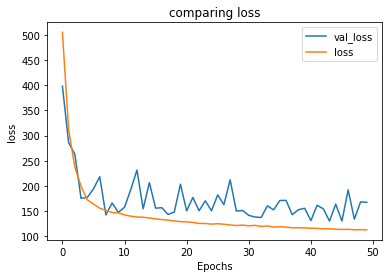

In [27]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('comparing loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss', 'loss'])

In [28]:
y_predict = model.predict(x_test)

## Random Forest

In [29]:
#RMSE 오차제곱근 구하기
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict) :
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('RMSE :', RMSE(y_test, y_predict))  #RMSE는 낮을 수록 좋음

RMSE : 282.7645600298966


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=16)
#n_estimators: 약한모형 n개를 만들겠어

rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

print('RMSE :', RMSE(y_test, rf_predict))

RMSE : 303.6417775662534


## XGBoost

In [31]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=16)

xgb.fit(x_train, y_train)
xgb_predict = xgb.predict(x_test)

print('RMSE :', RMSE(y_test, xgb_predict))

RMSE : 307.09072320247844


## LightGBM

In [32]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=100, random_state=16)

lgb.fit(x_train, y_train)
lgb_predict = lgb.predict(x_test)

print('RMSE :', RMSE(y_test, lgb_predict))

RMSE : 323.2746495922864


deeplearning rmse : 266.06

randomforest rmse : 303.64

xgboost rmse : 307.09

lightgbm rmse : 323.27

결과적으로 딥러닝 성능 > XGB 성능 > 랜포 성능 > LGBM 성능

## 모델링 결과값 비교 - kernel 함수

In [33]:
xgb = pd.DataFrame(xgb_predict)
rf = pd.DataFrame(rf_predict)
dnn = pd.DataFrame(y_predict)
lgb = pd.DataFrame(lgb_predict)

# reset_index
compare = pd.DataFrame(y_test).reset_index(drop=True)

compare['xgb'] = xgb
compare['rf'] = rf
compare['dnn'] = dnn
compare['lgb'] = lgb

compare.head()

,cnt,xgb,rf,dnn,lgb
0,1885,1803.070923,1700.24,2119.811035,1830.345197
1,2175,2228.828125,1803.82,2398.254395,2133.296789
2,2485,2598.814697,2191.37,2708.785889,2590.899050
3,2882,2683.149658,2206.67,2554.973633,2613.783086
4,2965,2590.693848,2276.35,2560.015625,2306.341169


<AxesSubplot:xlabel='cnt', ylabel='Density'>

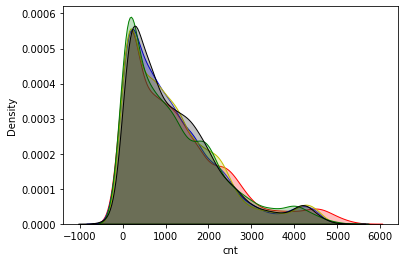

In [34]:
sns.kdeplot(compare['cnt'], shade=True, color='r')
sns.kdeplot(compare['xgb'], shade=True, color='b')
sns.kdeplot(compare['rf'], shade=True, color='y')
sns.kdeplot(compare['dnn'], shade=True, color='g')
sns.kdeplot(compare['lgb'], shade=True, color='black')